# Task - 5 Sales Prediction 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Perforning EDA
Univarite Analysis

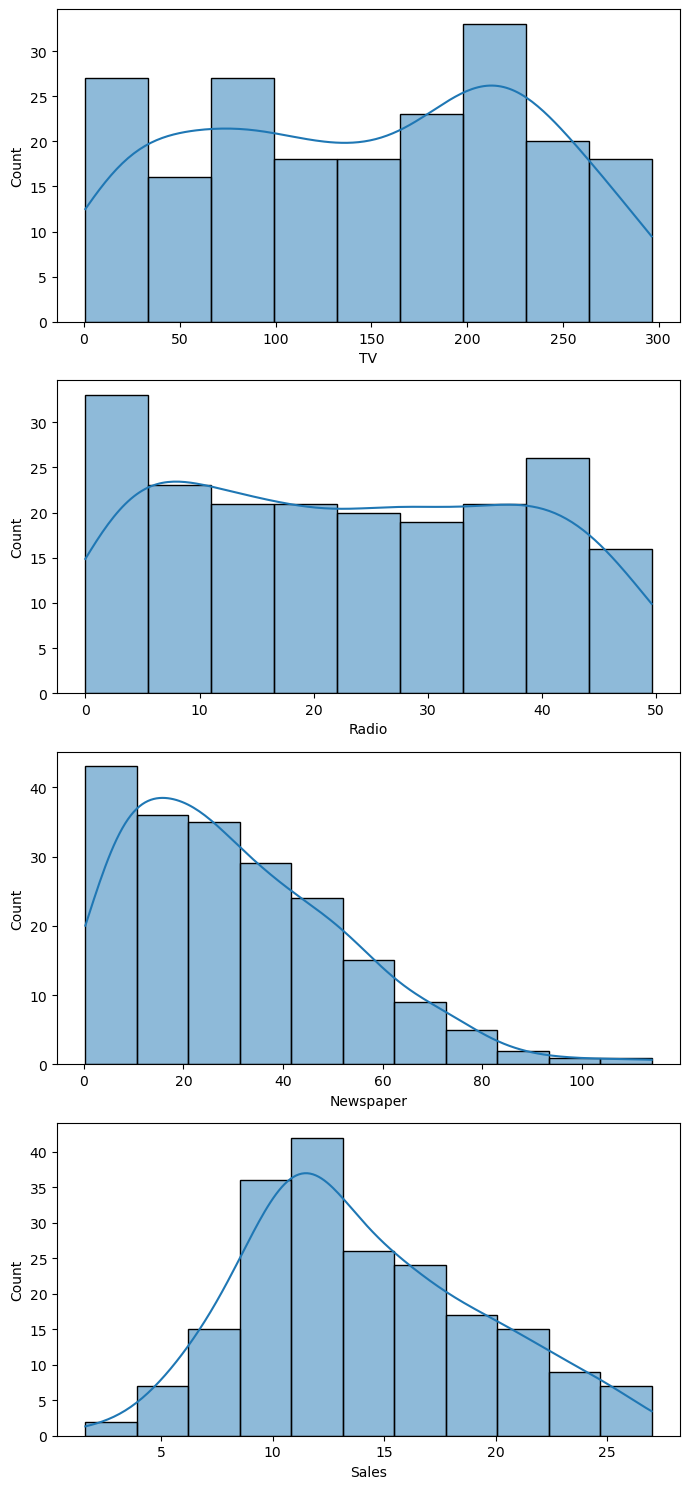

In [8]:
#creating subplot 
columns=['TV','Radio','Newspaper','Sales']
plt.figure(figsize=(7,15))  # Adjust the figure size as needed
for i in columns:
    plt.subplot(4,1, columns.index(i) + 1)
    sns.histplot(df[i],kde=True)
plt.tight_layout()

    


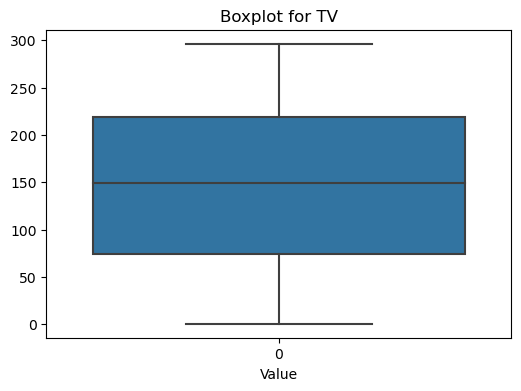

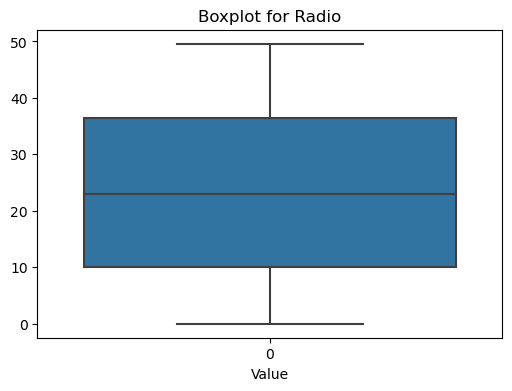

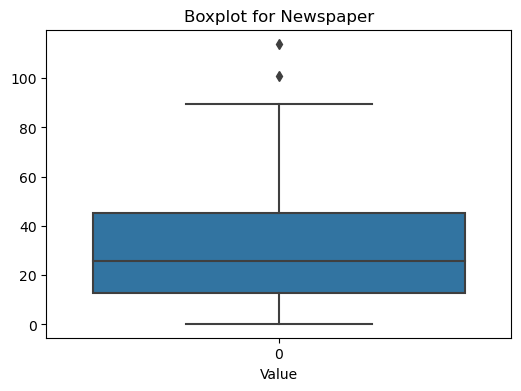

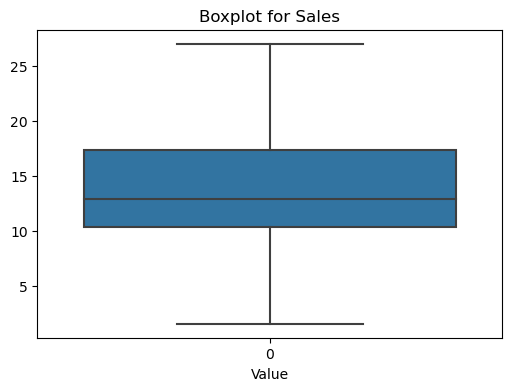

In [25]:
#Creating Box-Plot
for column in df.columns:
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel('Value')
    plt.show()



# Bivarite Analysis

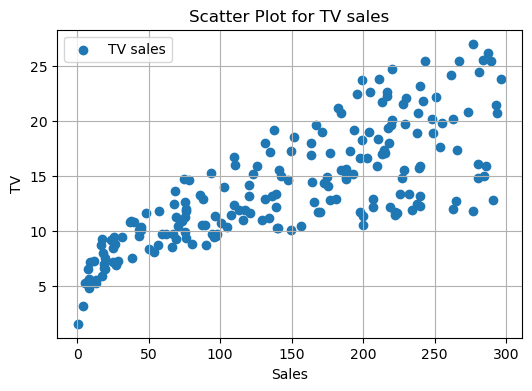

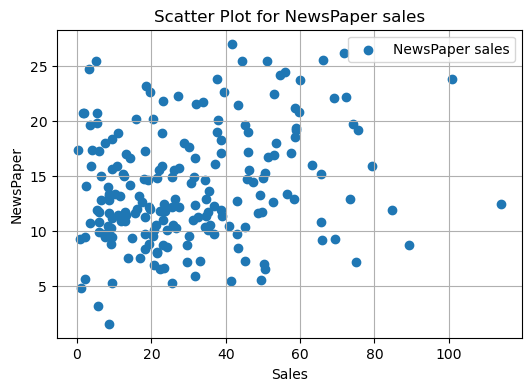

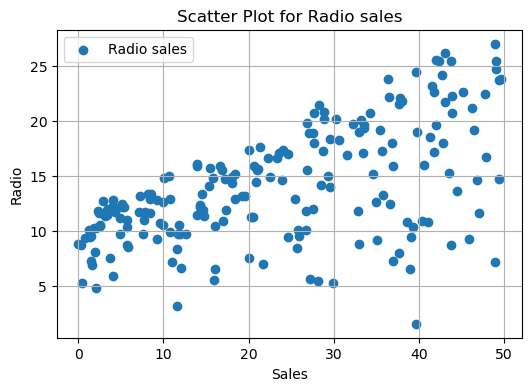

In [12]:
#Creating Scatter Plot

data_pairs = [
    (df["TV"], df["Sales"],'TV sales','Sales','TV'),
    (df["Newspaper"],df["Sales"],'NewsPaper sales','Sales','NewsPaper'),
    (df["Radio"],df["Sales"],'Radio sales','Sales','Radio')
]

# Create scatter plots using a for loop
for i, (x, y,label,x_label,y_label) in enumerate(data_pairs):
    plt.figure(figsize=(6, 4))  # Adjust figure size as needed
    plt.scatter(x, y, label=label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Scatter Plot for {label}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    
    
    # Create sample data (replace this with your own data)


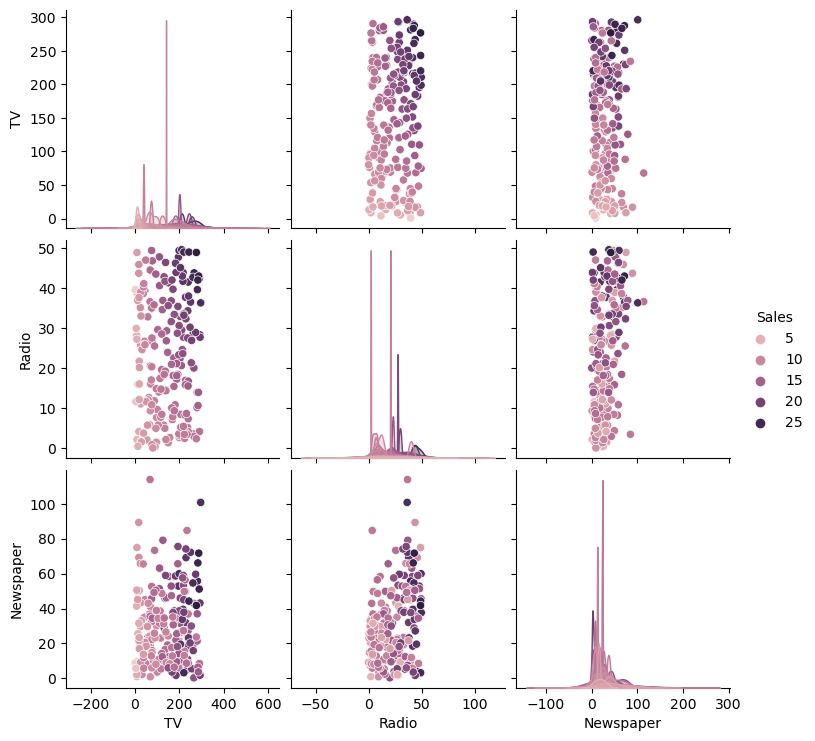

In [14]:
#Create PairPlot

sns.pairplot(df,hue='Sales')

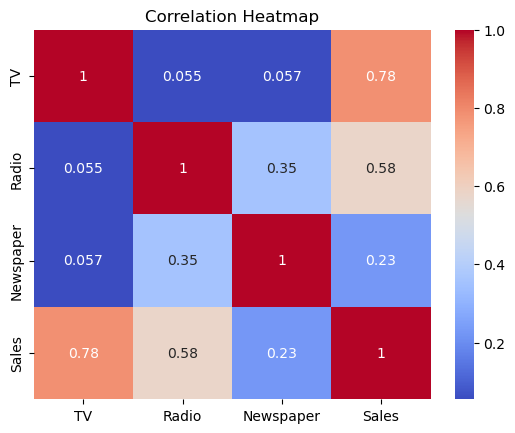

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
df.corr()*100

,TV,Radio,Newspaper,Sales
TV,100.000000,5.480866,5.664787,78.222442
Radio,5.480866,100.000000,35.410375,57.622257
Newspaper,5.664787,35.410375,100.000000,22.829903
Sales,78.222442,57.622257,22.829903,100.000000


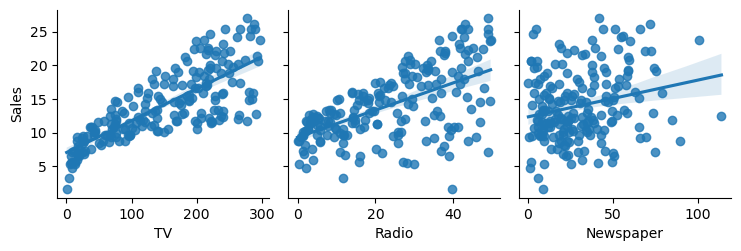

In [17]:
sns.pairplot(data = df,x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg",palette="pastel")
plt.show()

# Splitting Data Into Train and Test

In [18]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, random_state=10)


# Applying Model for Prediction

In [19]:
model=LinearRegression()


In [20]:
model.fit(x_train,y_train)

y_predict=model.predict(x_test)

In [21]:
print(model.intercept_)
print(model.coef_)

3.410641588611826
[ 0.04303172  0.19352212 -0.00386729]


In [22]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predict.flatten()
})
act_predict.sample(20)

,Actual,Predict
51,12.9,13.837394
35,11.8,15.670965
0,18.4,18.150362
28,23.2,21.693574
55,8.1,6.017123
45,8.8,10.875483
24,14.8,17.339943
5,14.6,14.300527
47,13.4,15.028949
8,22.3,21.130349


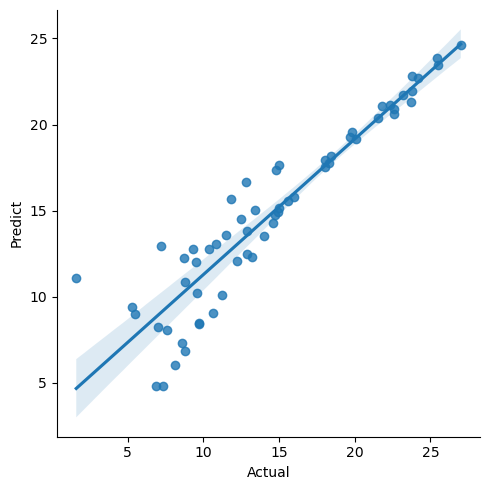

In [23]:
sns.lmplot(data=act_predict,x='Actual',y="Predict")


In [24]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predict)))
print("r2_score:",r2_score(y_test,y_predict)*100)

Mean_absolute_error: 1.7091210770106202
Mean_squared_error: 5.374051588095294
Squre_Mean_absolute_error: 1.3073335752632609
r2_score: 85.67790678044409


# ThankYou